# An Analysis of Referral Breakdown and New Patient Numbers Data

The purpose of this document is to present findings and observations that may be of use for Accident Care Specialist. More specifically, this document contains data regarding patient referrals by the marketing team and through which medium. The second set of data (and this is the data which I find to be the most interesting and insightful) concerns new patient data by facility. We will first start with the patient referral data. 

(Disclaimer: Don't pay any attention to the code and just focus on the outputs. I wrote up this report using Jupyter Notebook only because it is the most convenient way for me to write this report with Python.)

The first step is to compile the dataset which will consist of patient referral data from each month of 2023 except for December (this is because we do not have full data for this month).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
pwd

'C:\\Users\\19713\\Desktop\\ACS\\ACS Project 2\\New Patient Numbers Analysis'

In [3]:
df = pd.read_csv('C:\\Users\\19713\\Desktop\\ACS\\ACS Project 2\\New Patient Numbers Analysis\\df.csv')

Here are the first 50 rows of the dataset which contains the type of referral, its frequency, marketer name, and the number of referrals by each marketer. We can now use this dataset to make some observations.

In [4]:
df.head(50)

,Referral Breakdown,RB Frequency,Marketer,M Frequency
0,Online,50.0,Andrea/Miguel,18.0
1,Patient Referrals,40.0,Estefania,17.0
2,Attorney,34.0,Lauren/Alix,15.0
3,Medical,30.0,Linda,12.0
4,Auto Body,25.0,Yesenia,11.0
5,Insurance,22.0,Karla,9.0
6,Return Patient,16.0,Alma,6.0
7,Drive/Walk by,8.0,Nancy,2.0
8,Other,8.0,Alexis,1.0
9,ACS Employee Referral,5.0,Lily,1.0


In [5]:
rb_frequency = pd.DataFrame(df.groupby('Referral Breakdown')['RB Frequency'].sum())
total = rb_frequency['RB Frequency'].sum()
rb_frequency['RB Frequency Proportion'] = (rb_frequency['RB Frequency'] / total) * 100
explode = np.zeros(13)
explode[0] = 0.2

([<matplotlib.patches.Wedge at 0x1c77ff6af70>,
 [Text(1.1056963230374826, 0.9610726513752177, 'Online'),
  Text(-0.45039902996149955, 1.1821022433824158, 'Patient Referrals'),
  Text(-1.1938066552857094, 0.41839057087313464, 'Attorney'),
  Text(-1.173723579859649, -0.47180288053534597, 'Medical'),
  Text(-0.6593038450152913, -1.0796033715897948, 'Auto Body'),
  Text(-0.015058690952608894, -1.2649103667164696, 'Insurance'),
  Text(0.5177544894681069, -1.1541903173374917, 'Return Patient'),
  Text(0.8376176591986717, -0.9479565691520564, 'Drive/Walk by'),
  Text(1.0348366396055533, -0.7275562722771938, 'Other'),
  Text(1.1640289782997972, -0.4952388693129103, 'ACS Employee Referral'),
  Text(1.2347040413582109, -0.2751925330631288, 'Transfer'),
  Text(1.2602742095846524, -0.10924246727248257, 'Marketing Team'),
  Text(1.2647129790957803, -0.02694588107069462, 'Unknown')],
 [Text(0.6717199505142386, 0.5838598359890401, '22.8%'),
  Text(-0.24567219816081795, 0.644783041844954, '16.0%'),
  

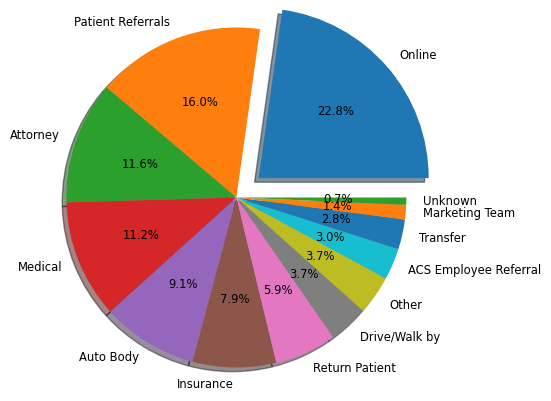

In [6]:
labels = df['Referral Breakdown'].unique()
sizes = rb_frequency['RB Frequency Proportion'].sort_values(ascending = False)

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels, 
       autopct = '%1.1f%%', 
       textprops={'size': 'smaller'}, 
       radius=1.15, 
       explode = explode,
       shadow=True)

This is a pie chart showing the percentages for every medium from which a new patient was attained. The 'online' method was the most common method, accounting for 22.8% of the new patient referrals. This suggests that we should continue to focus on attaining new paitients through online advertisements.

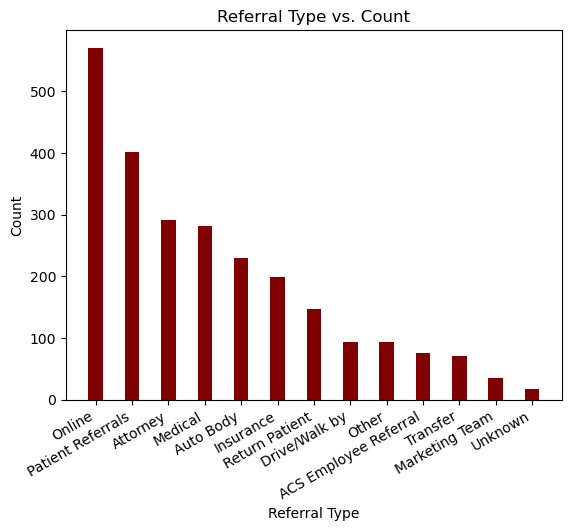

In [7]:
labels = df['Referral Breakdown'].unique()
values = rb_frequency['RB Frequency'].sort_values(ascending = False)
plt.bar(labels, values, color ='maroon', 
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Referral Type')
plt.ylabel('Count')
plt.title('Referral Type vs. Count')
plt.savefig('referral_type_bar_chart.jpg')

A bar chart contaning the frequency of the referral types.

Below shows the trend of patient referral by type over the course of this year. There is no obvious trend of a growth or decline for any of the types.

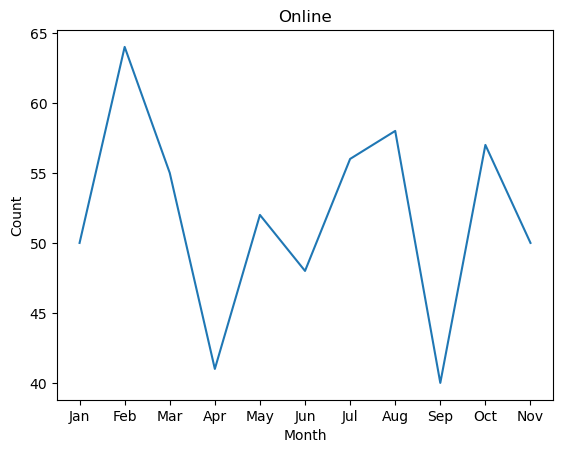

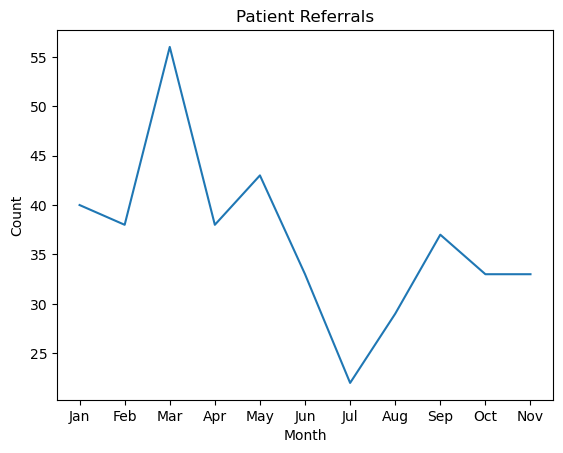

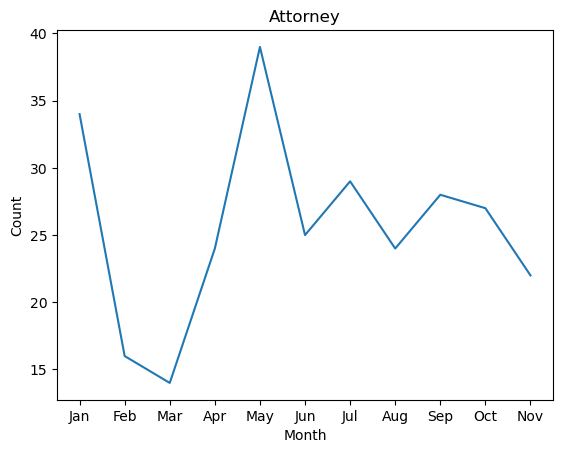

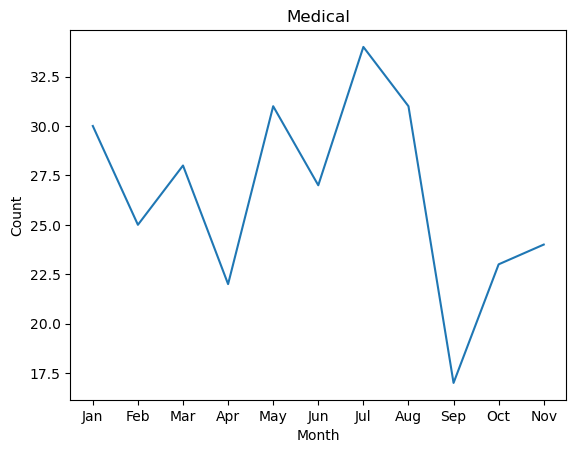

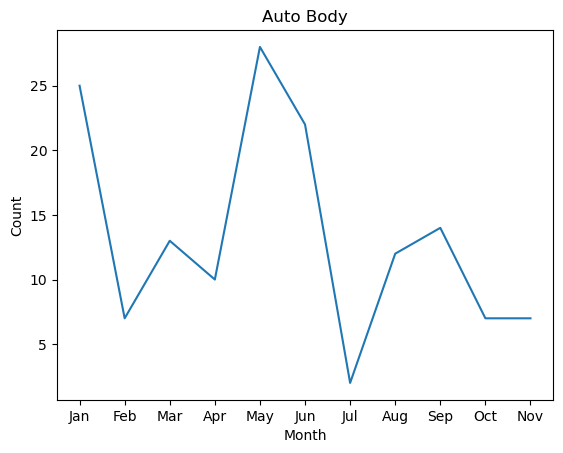

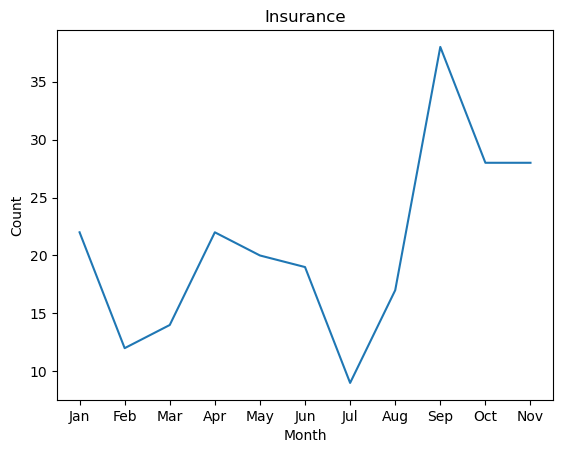

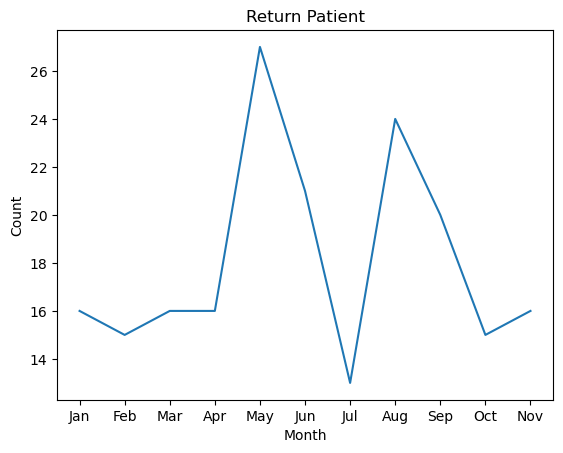

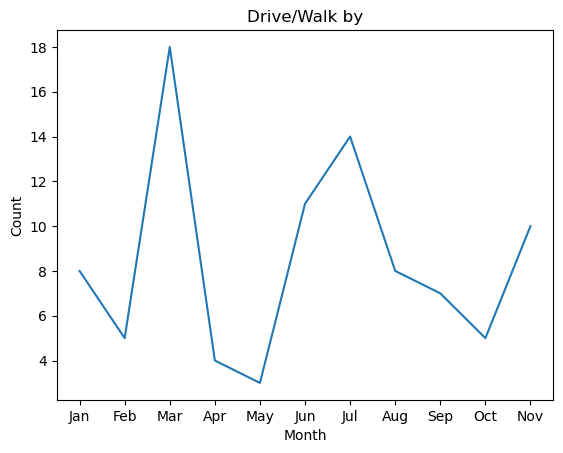

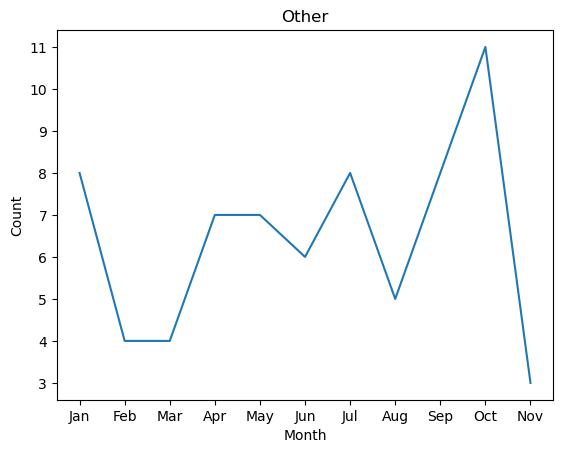

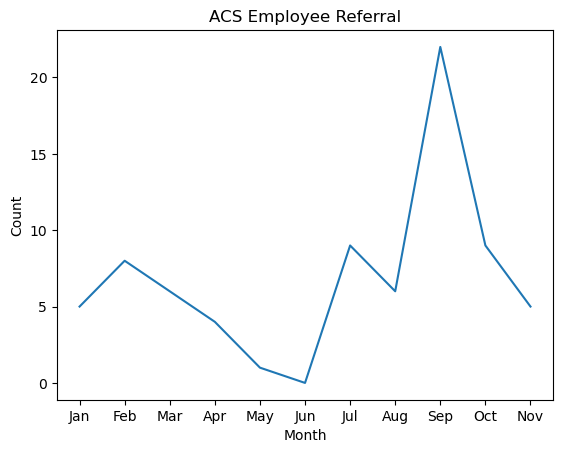

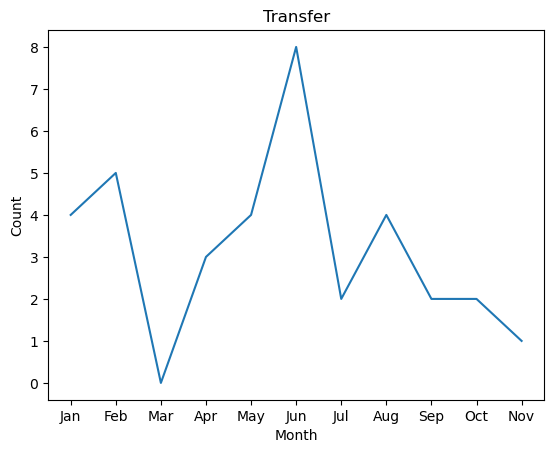

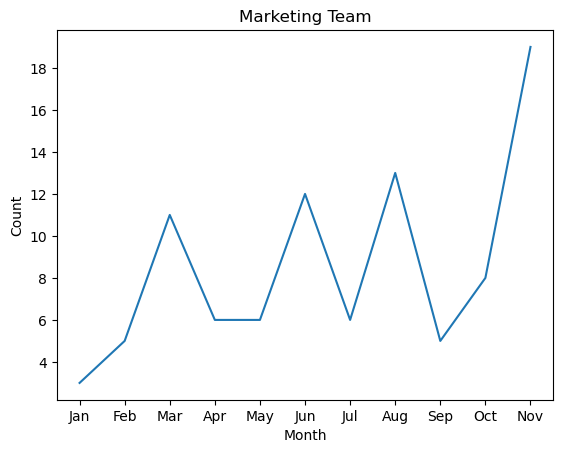

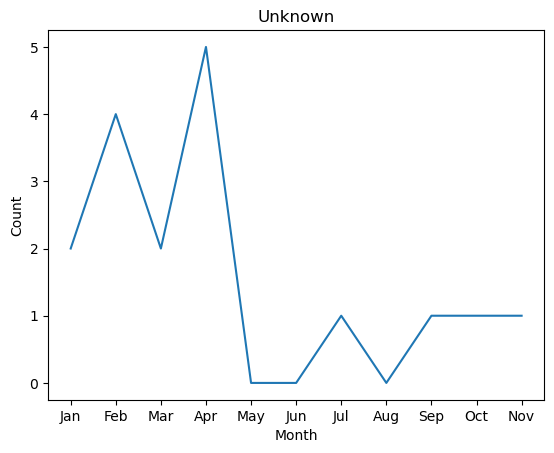

In [8]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
for i in df['Referral Breakdown'].unique():
    plt.plot(months, df[df['Referral Breakdown'] == i]['RB Frequency'].values)
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'{i}')
    plt.show()

In [9]:
df.groupby('Marketer').sum()['M Frequency'].sort_values(ascending = False)

Marketer
Estefania        181.5
Andrea/Miguel    153.0
Alix/Lauren      146.0
Yesenia           97.0
Karla             77.0
Alma              67.5
Linda             63.0
Lily              32.0
Nancy             24.0
Lauren/Alix       15.0
Alexis            11.0
Dr. Linda          9.0
Sara               5.0
Chris              1.0
0                  0.0
Name: M Frequency, dtype: float64

Here are the total number of patients brought in by each member of the marketing team. Alix and Lauren show up twice on this list curiously enough. Estefania has brought in the most patients with 181.5, which also raises the question of how a 0.5 ended up there but we can just ignore it.

In [10]:
df1 = pd.read_csv('C:\\Users\\19713\\Desktop\\ACS\\ACS Project 2\\New Patient Numbers Analysis\\df1.csv')
df1

,Location,week 1,week 2,week 3,week 4,week 5,Total NP s,MoM,YoY,min,ideal,LY
0,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan
1,forest grove,NaN,NaN,5,2,0,7,7.0,NaN,4-6,8,NaN
2,hillsboro,3.0,4.0,4,3,1,15,-2.0,-17,10,15,32.0
3,beaverton,5.0,4.0,3,1,1,14,5.0,+6,4-6,10,8.0
4,tigard,2.0,3.0,5,0,3,13,-10.0,-7,4,10,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190,e. vancouver,1,1,1,1.0,2,6,-6,NaN,5,15,12.0
191,vancouver,3,3,2,1.0,1,10,0,NaN,10,25,24.0
192,gresham,2,5,2,2.0,4,15,-4,NaN,10,15,23.0
193,hazel dell,1,0,3,0.0,1,5,0,NaN,4-6,10,NaN


In the dataset titled "df1" above, what I did was put together all of the monthly new patient excel files and cleaned it up to get this nice and neat looking dataset. What is more important however, is the dataset I created below which is based on the dataset above.

In [29]:
df2 = pd.read_csv('C:\\Users\\19713\\Desktop\\ACS\\ACS Project 2\\New Patient Numbers Analysis\\df2.csv')

In [30]:
population = [26180, 112687, 99772, 57344, 43744, 45514, 435024, 25943, 3063, 34759, 35159, 38760, 1227, 194384, 110097, 107305, 181620, 21650]

In [33]:
df2['Population'] = population

In [34]:
df2

,Location,ideal,Average number of new patients per month,Avg Number minus Ideal,Number of months in which facility did not meet ideal count,Total Number of New Patients,Number of New Patients per 100000,Population
0,forest grove,8,9,1,6,100,381,26180
1,hillsboro,15,12,-3,8,140,124,112687
2,beaverton,10,14,4,2,158,158,99772
3,tigard,10,14,4,2,158,275,57344
4,se pdx,35,28,-7,9,314,717,43744
5,ne pdx,15,15,0,5,167,366,45514
6,clackamas,15,18,3,5,202,46,435024
7,salem,15,15,0,6,171,659,25943
8,s. salem,10,11,1,3,131,4276,3063
9,keizer,15,14,-1,6,157,451,34759


There are some new columns I created which I think are of great interest. First off, we have the average number of new patients per month. As every facility has a different quota to meet, the column 'Avg Number minus Ideal' gives us an idea of how well these facilities do in terms of bringing in new patients. For example, the Beaverton and Tigard locations average 4 new patients more than their ideal number, while Bend and SE PDX average 7 new patients less than their ideal number. This gives us an idea of how well these facilities are doing in regards to their own standards.

Another point of interest are the number of months in which the facility met its ideal quota. Let's take a look at that below.

In [18]:
df2.sort_values(by = 'Number of months in which facility did not meet ideal count', ascending = False)[['Location', 'Number of months in which facility did not meet ideal count', 'Avg Number minus Ideal']]

,Location,Number of months in which facility did not meet ideal count,Avg Number minus Ideal
15,bend,11,-7
10,mcminville,10,-5
4,se pdx,9,-7
13,vancouver,9,-6
1,hillsboro,8,-3
12,e. vancouver,7,-2
0,forest grove,6,1
16,north portland,6,-7
11,woodburn,6,0
9,keizer,6,-1


In [21]:
round(df2['Number of months in which facility did not meet ideal count'].corr(df2['Avg Number minus Ideal']), 2)

-0.73

Given that we have 11 months worth of data to work with, the first row above shows that the Bend location failed to meets its quota for every month this year. On the other hand, Gresham met its ideal monthly quota of 15 new patients 10 of the last 11 months. Moreover, we see that the locations with the highest number of months in which their quota was not met have negative differences between their average and their ideal. In fact, both columns are highly correlated with a correlation of -0.73. Below is a bar chart of the number of months in which each location did not meet its quota.

Text(0.5, 1.0, 'Location versus Number of Months below Ideal Count')

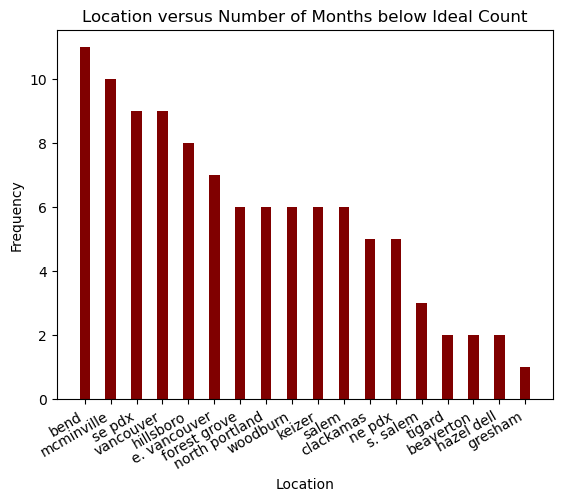

In [22]:
labels = df2.sort_values(by = ['Number of months in which facility did not meet ideal count'], ascending = False)['Location']
values = df2.sort_values(by = ['Number of months in which facility did not meet ideal count'], ascending = False)['Number of months in which facility did not meet ideal count']
plt.bar(labels, values, color ='maroon', 
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Location versus Number of Months below Ideal Count')

A naive approach to the problem of allocating more resources towards the locations which are struggling to attract new patients would be to only focus on the locations which have the highest number of months below their ideal count. These locations would be Bend, Mcminville, SE PDX, and Vancouver. However, there are several factors to take into account. First, each facility has a different ideal number, as certain locations are located in cities with a higher probability of new patient attainment. Second, each location's city has a different population, and it would not be definitively erroneous to assume that the more people live in a city, the more new patients a facility can have. For example, if town A and town B have only one chiropractic facility each and have popoulations 1000 and 10000 respectively, then town B has more potential new patients than town A. Therefore, I thought it would be also worthwile to adjust for population and take a look at the number of new patients per 100000 people for each location.

In [35]:
df2.sort_values(by = 'Number of New Patients per 100000', ascending = False)[['Location', 'Number of New Patients per 100000', 'Population']]

,Location,Number of New Patients per 100000,Population
12,e. vancouver,11817,1227
8,s. salem,4276,3063
4,se pdx,717,43744
7,salem,659,25943
9,keizer,451,34759
0,forest grove,381,26180
5,ne pdx,366,45514
11,woodburn,301,38760
3,tigard,275,57344
14,gresham,192,110097


The top three locations with the highest number of new patients per 100000 persons are East Vancouver, South Salem, and SE PDX. For the first two locations, their high numbers can be accounted for due to the use of the local populations which are quite small. This would make the numbers larger than it may actually be. If we were to use the city populations for each location respectively, then we would have the following:

In [61]:
dict1 = {'East Vancouver' : 194384, 'South Salem': 181620}
df3 = pd.DataFrame.from_dict(dict1, orient = 'index')
df3.rename(columns = {0 : 'Population'}, inplace = True)
df3['Number of New Patients per 100000'] = [(145 / 194384) * 100000, (131 / 181620) * 100000]
df3['Number of New Patients per 100000'] = df3['Number of New Patients per 100000'].astype(int)
df3

,Population,Number of New Patients per 100000
East Vancouver,194384,74
South Salem,181620,72


These numbers are vastly different than what we see in the cell above. If we were to use regional populations, then we could say that East Vancouver and South Salem are doing very well. However, we have the following for these two locations:

In [73]:
df2[df2['Location'].isin(['e. vancouver', 's. salem'])]

,Location,ideal,Average number of new patients per month,Avg Number minus Ideal,Number of months in which facility did not meet ideal count,Total Number of New Patients,Number of New Patients per 100000,Population
8,s. salem,10,11,1,3,131,4276,3063
12,e. vancouver,15,13,-2,7,145,11817,1227


East Vancouver did not meet its quota 7 of the 11 months of the year. This highlights the importance of using multiple metrics in judging performance. Let's return to the following dataset. 

In [74]:
df2.sort_values(by = 'Number of New Patients per 100000', ascending = False)[['Location', 'Number of New Patients per 100000', 'Population']]

,Location,Number of New Patients per 100000,Population
12,e. vancouver,11817,1227
8,s. salem,4276,3063
4,se pdx,717,43744
7,salem,659,25943
9,keizer,451,34759
0,forest grove,381,26180
5,ne pdx,366,45514
11,woodburn,301,38760
3,tigard,275,57344
14,gresham,192,110097


We will ignore the first two locations as we are using regional populations. In doing so, we see that SE PDX has the highest number of new patients per 100000 persons. Putting that in a bar chart gives us the following:

Text(0.5, 1.0, 'Number of New Patients per 100000')

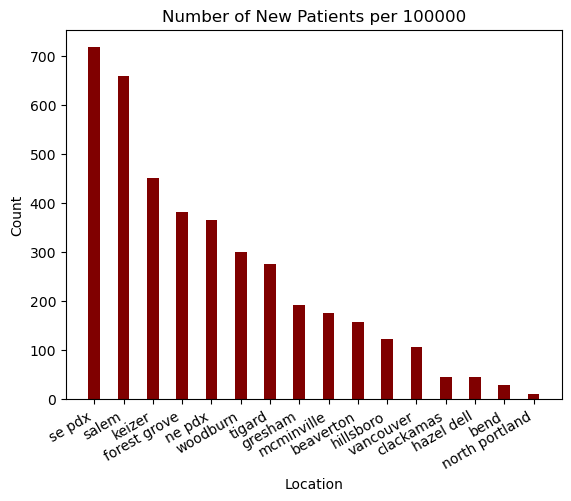

In [75]:
labels = df2.sort_values(by = 'Number of New Patients per 100000', ascending = False)['Location'].drop([12, 8])
values = df2.sort_values(by = 'Number of New Patients per 100000', ascending = False)['Number of New Patients per 100000'].drop([12, 8])
plt.bar(labels, values, color ='maroon', 
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of New Patients per 100000')

This gives us some perspective as to how many new patients each location brings in relative to its population. SE PDX is at the top of this list, followed by Salem, Keizer, and Forest Grove. However, it is important to note that this does not give us a clear picture of the performances of these locations, only how many new patients they bring in respective to their populations. As shown below, SE PDX and Keizer had 9 and 6 months respectively in which they did not meet their quotas along with negative averages below their ideal numbers.

In [82]:
df2[df2['Location'].isin(['se pdx', 'keizer', 'forest grove'])]

,Location,ideal,Average number of new patients per month,Avg Number minus Ideal,Number of months in which facility did not meet ideal count,Total Number of New Patients,Number of New Patients per 100000,Population
0,forest grove,8,9,1,6,100,381,26180
4,se pdx,35,28,-7,9,314,717,43744
9,keizer,15,14,-1,6,157,451,34759


One question that comes to mind is, what is the best explanatory metric, that is, which metric is the best indicator of a location's performance? I would argue that it is the average number minus ideal. I believe this is true because each location can be judged by their own standard (their ideal quota) and because the other metrics can be misleading or wrongly interpreted. For example, we have the metric "Number of months in which facility did not meet ideal count." This is a good metric if we want to take a look at a location's performance over the course of the year, but without diving into its average numbers we can be mislead if we were to only focus on this metric alone. For example, Forest Grove has 6 months in which it did not meet its quota. However, it averages 1 more new patient than its ideal number of 8 new patients per month. How could that be the case?

In [103]:
df4 = pd.DataFrame(df1[df1['Location'] == 'forest grove'][['Total NP s', 'ideal']])
df4 = df4.astype(int)
df4['Difference'] = df4['Total NP s'] - df4['ideal']
df4.sort_values('Difference')

,Total NP s,ideal,Difference
18,4,8,-4
104,4,8,-4
69,6,8,-2
122,6,8,-2
158,6,8,-2
1,7,8,-1
52,10,8,2
35,12,8,4
86,13,8,5
140,16,8,8


In [105]:
df4[df4['Difference'] < 0]['Difference'].sum()

-15

In [107]:
-15/6

-2.5

In [106]:
df4[df4['Difference'] > 0]['Difference'].sum()

27

In [108]:
27/5

5.4

In the dataset above, we have the total number of new patients, its ideal quota, and the difference of the two numbers for the Forest Grove location. There are six months in which Forest Grove had a negative difference and five months in which it had a positive difference. Forest Grove averaged 2.5 new patients less than their ideal for every month in which the difference was negative and 5.4 new patients more than their ideal for every month in which the difference was positive. The surplus is more than twice as much as the deficit! This shows that even though there were more negative months than positive months, overall Forest Grove exceeded expectations due to it having been able to attract more than twice as many new patients in its positive months when compared to its negative months.

Let's then take a look at the average number minus ideal for each location along with a bar chart of this statistic.

In [112]:
df2.sort_values(by = 'Avg Number minus Ideal')[['Location', 'Avg Number minus Ideal']]

,Location,Avg Number minus Ideal
15,bend,-7
4,se pdx,-7
16,north portland,-7
13,vancouver,-6
17,hazel dell,-5
10,mcminville,-5
1,hillsboro,-3
12,e. vancouver,-2
9,keizer,-1
5,ne pdx,0


In [118]:
df2.sort_values(by = 'Avg Number minus Ideal', ascending = False)[['Location', 'Avg Number minus Ideal']]

,Location,Avg Number minus Ideal
2,beaverton,4
3,tigard,4
14,gresham,4
6,clackamas,3
0,forest grove,1
8,s. salem,1
11,woodburn,0
5,ne pdx,0
7,salem,0
9,keizer,-1


Text(0.5, 1.0, 'Location versus Number of Months below Ideal Count')

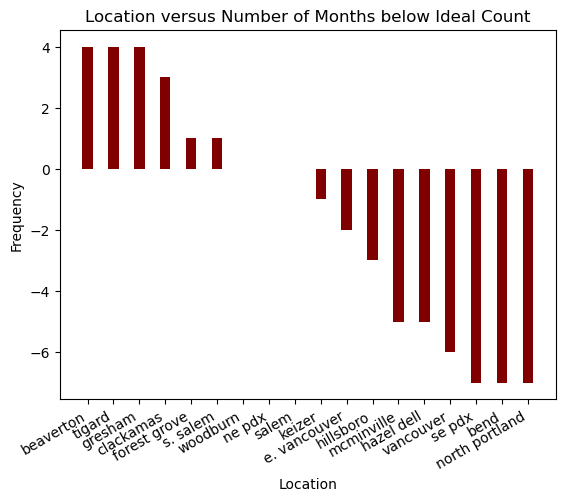

In [119]:
labels = df2.sort_values(by = 'Avg Number minus Ideal', ascending = False)['Location']
values = df2.sort_values(by = ['Avg Number minus Ideal'], ascending = False)['Avg Number minus Ideal']
plt.bar(labels, values, color ='maroon', 
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Location versus Number of Months below Ideal Count')

From the bar chart above, we see that all of the locations to the right of Keizer including Keiser have an average new number of patients below their ideal count. Another interesting question that might be worth exploring is how much competition each facility has to face in their respective cities.

In [133]:
number_of_cps_list = [228, 228, 228, 228, 509, 509, 152, 96, 96, 96, 24, 96, 651, 651, 509, 97, 509, 651]
df2['Number of Chiropractors in County'] = number_of_cps_list

In [136]:
df2['Number of Chiropractors per 100000'] = round(df2['Number of Chiropractors in County'] / df2['Population'] * 100000, 2)

In [137]:
df2.sort_values(by = 'Avg Number minus Ideal')

,Location,ideal,Average number of new patients per month,Avg Number minus Ideal,Number of months in which facility did not meet ideal count,Total Number of New Patients,Number of New Patients per 100000,Population,Number of Chiropractors in County,Number of Chiropractors per 100000
15,bend,10,3,-7,11,33,30,107305,97,90.40
4,se pdx,35,28,-7,9,314,717,43744,509,1163.59
16,north portland,10,3,-7,6,23,12,181620,509,280.26
13,vancouver,25,19,-6,9,209,107,194384,651,334.90
17,hazel dell,10,5,-5,2,10,46,21650,651,3006.93
10,mcminville,10,5,-5,10,62,176,35159,24,68.26
1,hillsboro,15,12,-3,8,140,124,112687,228,202.33
12,e. vancouver,15,13,-2,7,145,11817,1227,651,53056.23
9,keizer,15,14,-1,6,157,451,34759,96,276.19
5,ne pdx,15,15,0,5,167,366,45514,509,1118.34


In the last two columns of this dataset, I added the number of chiropractors per county in which the city was located in as well as the number of chiropractors per 100000 (unfortunately, there is no data on the number of chiropractic facilites in each city, so I had to settle for county instead). We could assume that the more chiropractors there are in a county, there more facilities there are, and therefore more competition that ACS has to face. This could then imply that the lower the number of chiropractors per 100000 is, the higher the average number minus ideal will be (our chosen metric for new patient attainment performance). However, we see below that the correlation is virtually zero, meaning that there is almost no associated relationship between the two variables. In conclusion, competition may not be such an important factor when it comes to attaining new patients.

In [138]:
df2['Avg Number minus Ideal'].corr(df2['Number of Chiropractors per 100000'])

-0.0386218659019798

## Conclusion:

There is a lot of information that I have compiled together here, and it can seem overwhelming if we do not have a clear picture of what problem we are trying to solve in the first place. Given what I know of the problem at hand, there are some facilities that are not meeting expectations in regards to attracting new patients, and some facilites that are exceeding expectations. We would like to focus on those which struggle to bring in new patients, and the data that I have explored and analyzed may be of use in helping us solve this problem. There is always more to be done before we can shake hands and say "mission accomplished," and I hope that what I have presented in this report will be a good first step towards accomplishing our goal.